## Diabetes Data Analysis & Predict

In [2]:
# project flow- 
# 1. data processing and cleaning
# 2. data normalize : data std. & scaling , outliers detect & remove
# 3. data manipulation
# 4. general viualization
# 5. Principle Component analysis
# 6. feature engineering
# 7. Modelling - for prediction    

In [89]:
# data analysis packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv("diabetes.csv")

In [91]:
# copy of data
df = data.copy()

## Data processing and cleaning

In [92]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.shape

(768, 9)

In [94]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
# check null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [97]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [98]:
# 0 value came in skinThickness that not right its a nan value
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
33     20
28     20
31     19
39     18
19     18
29     17
25     16
40     16
22     16
37     16
26     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
16      6
11      6
45      6
14      6
43      6
44      5
10      5
47      4
48      4
49      3
50      3
54      2
8       2
52      2
7       2
60      1
51      1
56      1
63      1
99      1
Name: count, dtype: int64

In [99]:
# blood pressure can never be zero
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

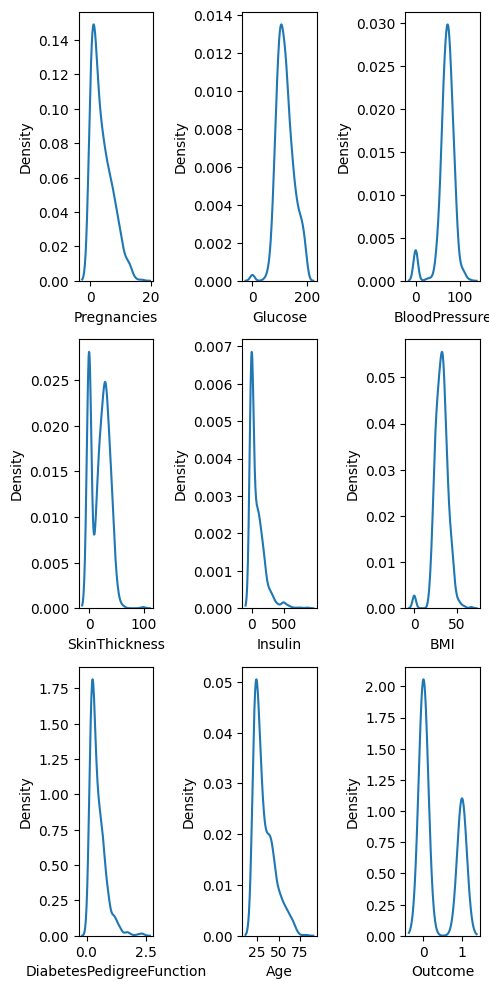

In [100]:
# need to draw kernal density estimation to saw 0 values in all features except outcomes
int_var = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(5,10))
axs = axs.flatten()

for i, var in enumerate (int_var):
    sns.kdeplot(x=var, data=df, ax=axs[i])

plt.tight_layout()
plt.show()

In [101]:
# 0 values in every column means its nan values
# need to replace that value to  nan

df.replace({
    'Pregnancies':0,
    'Glucose':0,
    'BloodPressure':0,
    'SkinThickness':0,
    'Insulin':0,
    'BMI':0,
    'DiabetesPedigreeFunction':0,
    'Age':0
}, np.nan, inplace=True) # nan- not a no. (dtype- float)

In [102]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [103]:
# HANDLING MISSING VALUES
#we fill nan values in pregnancies feature using mode because mean or median change the ND shape
#mean and median shrink the shape of ND increase std that why i fill nan values with mode
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mode()[0])

#mode used for  best shape of ND normal distribution
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mode()[0])


df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mode()[0])


df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mode()[0])


df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mode()[0])


df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])

## Normalize / standardize data and Outliers detect and remove

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [105]:
# data type convert float to int
df['Pregnancies'] = df['Pregnancies'].astype(int)
df['Glucose'] = df['Glucose'].astype(int)
df['BloodPressure'] = df['BloodPressure'].astype(int)
df['SkinThickness'] = df['SkinThickness'].astype(int)
df['Insulin'] = df['Insulin'].astype(int)
df['BMI'] = df['BMI'].astype(int)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(int)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


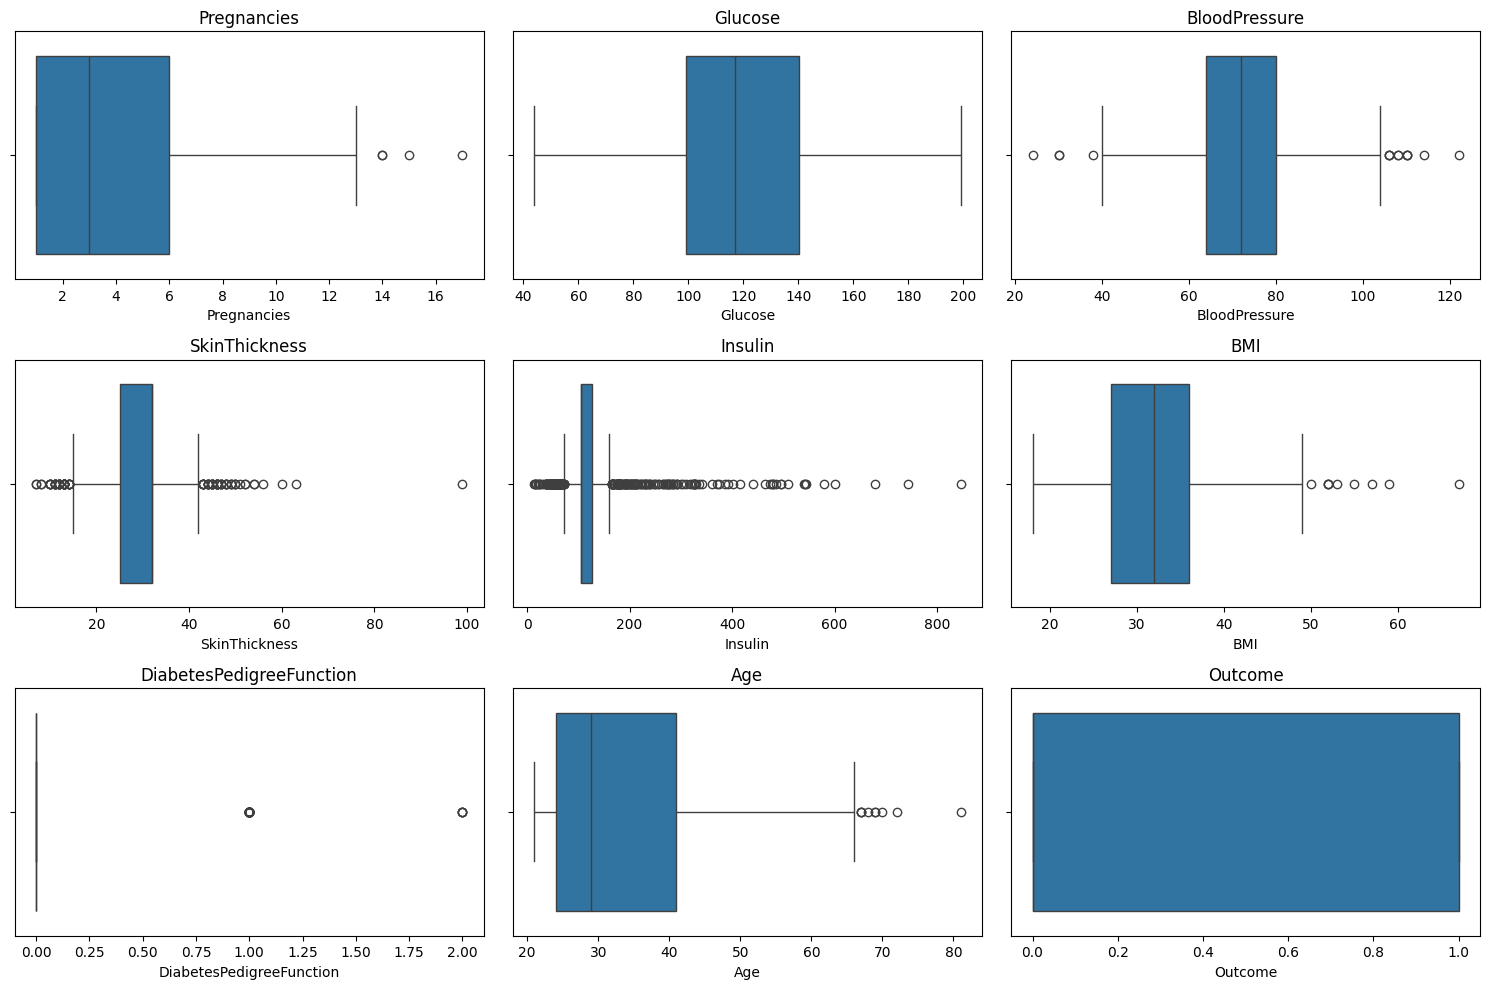

In [107]:
# outliers check
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()




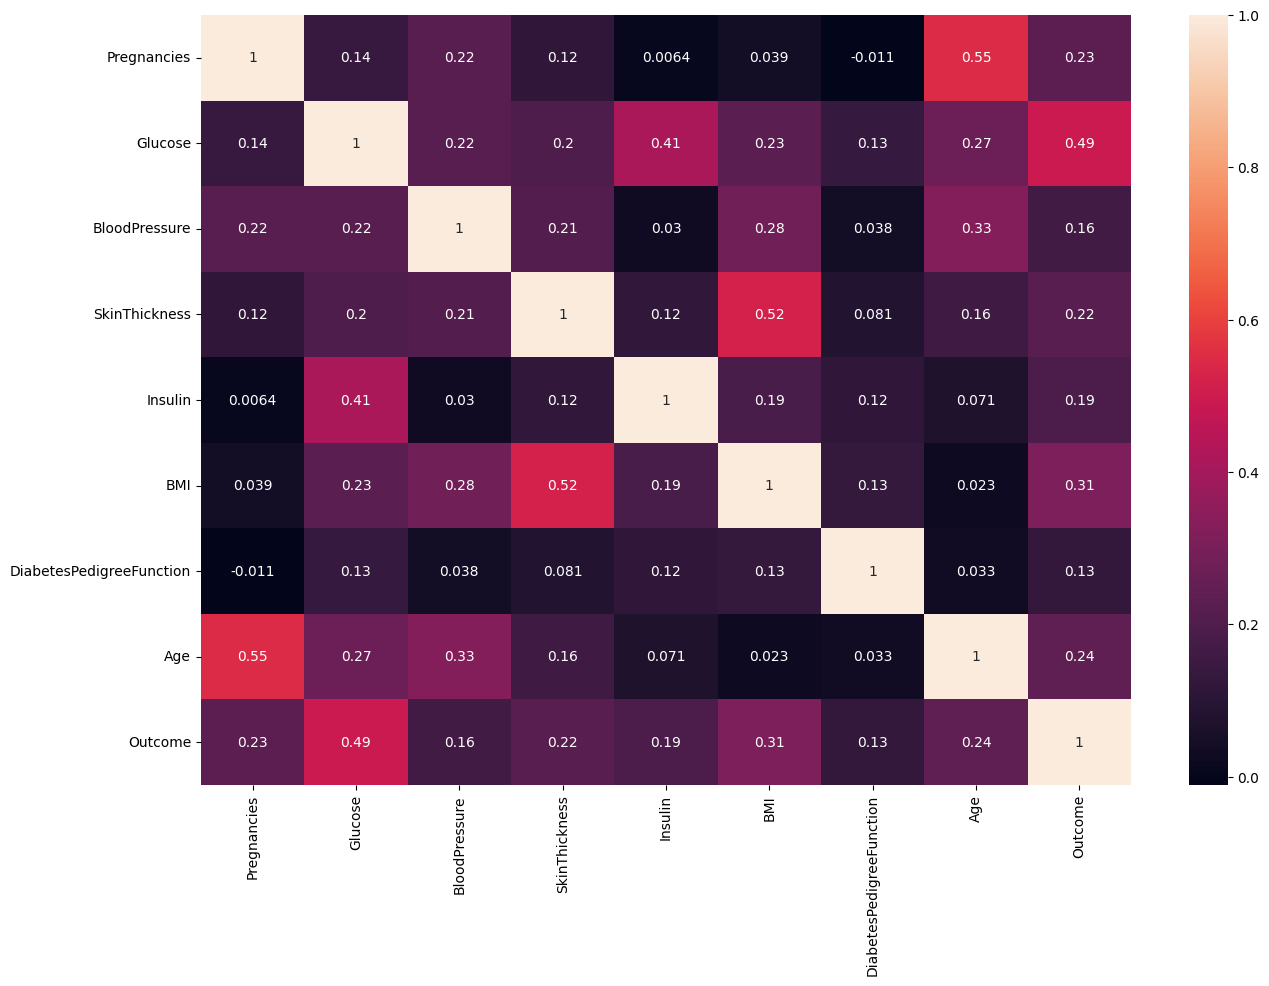

In [108]:
# co-relation by heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g', annot= True)
plt.show()

In [109]:
Features_with_outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']


In [110]:
# remove outliers by IQR (inter - quartile range)

def remove_outliers(out):
    # calculate IQ1 AND IQ3
    q1 = np.percentile(out, 25)
    q3 = np.percentile(out, 75)

    # calculate IQR Range
    iqr = q3 -q1
    # define lower and upper bounds of outliers
    lower_bound = q1 - 1.5* iqr
    upper_bound = q1 + 1.5* iqr
    lower_bound ,upper_bound
    #remove outliers
    out= np.where(out>upper_bound, upper_bound, np.where(out<lower_bound, lower_bound, out))
    return out[(out >= lower_bound) & (out <= upper_bound)]

In [111]:
for column in Features_with_outliers:
    df[column] = remove_outliers(df[column])

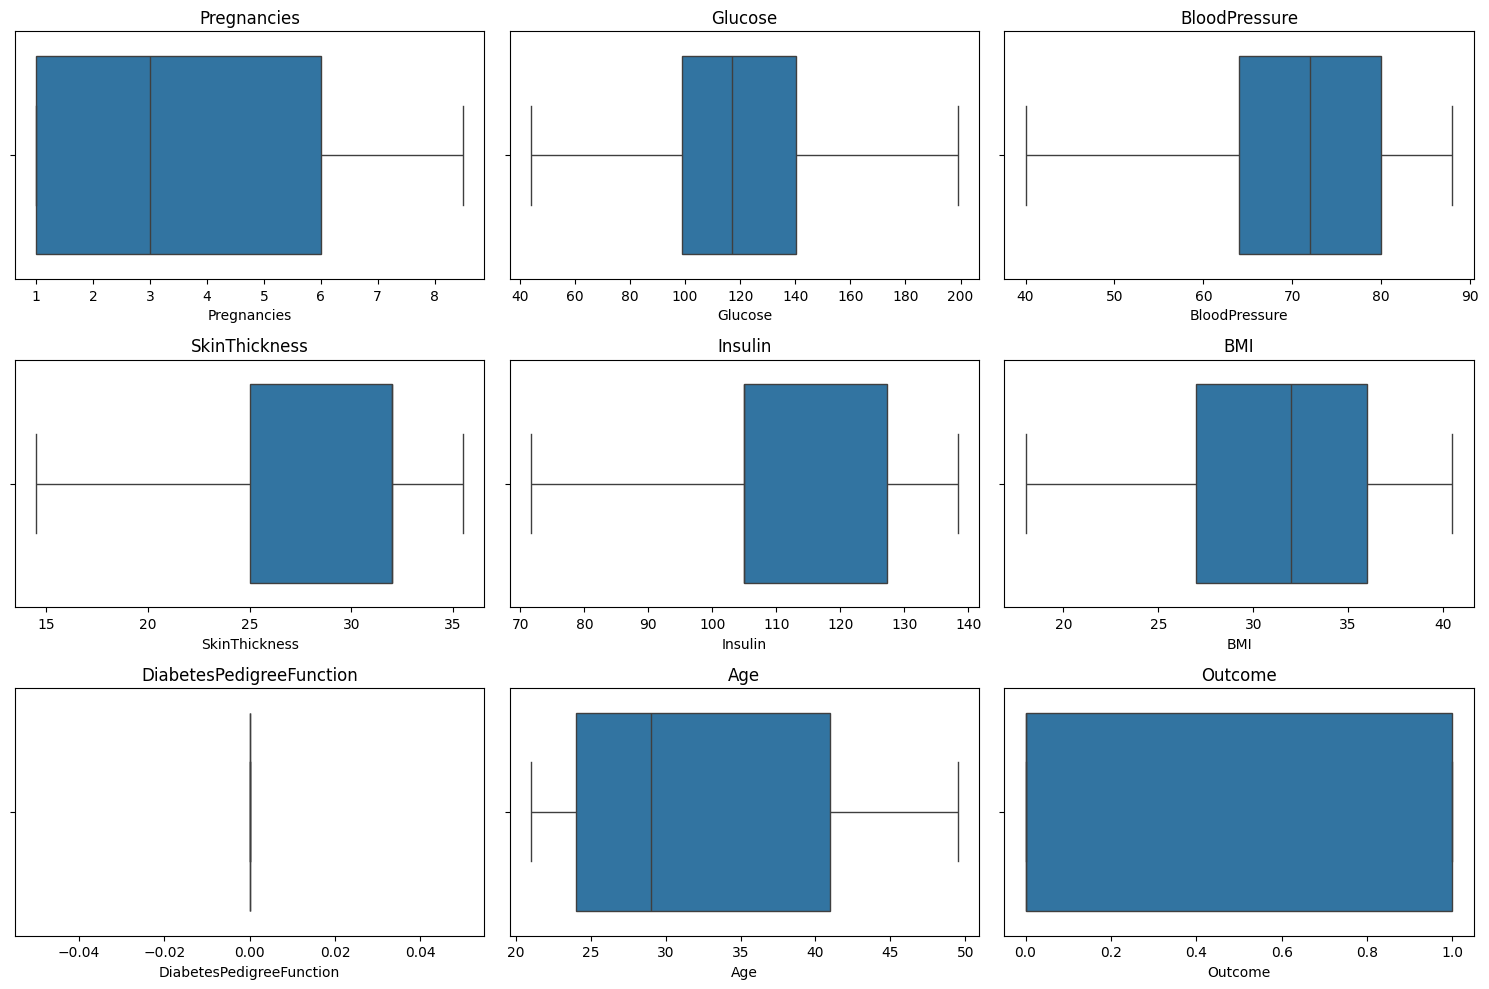

In [112]:
int_var = df.select_dtypes(include = ['int','float'])
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_var):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()


In [115]:
# modelling -> logistic regression use 